<a href="https://colab.research.google.com/github/Mu1029/Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Object Masking

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

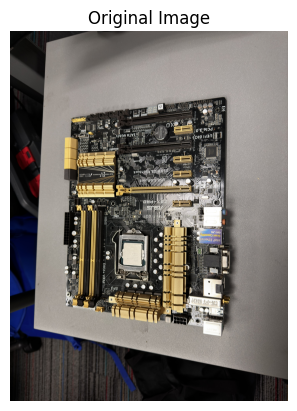

In [ ]:
# read and display original image

pcb_image_bgr = cv2.imread('drive/MyDrive/Project 3 Data/motherboard_image.JPEG')

pcb_image = cv2.cvtColor(pcb_image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(pcb_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

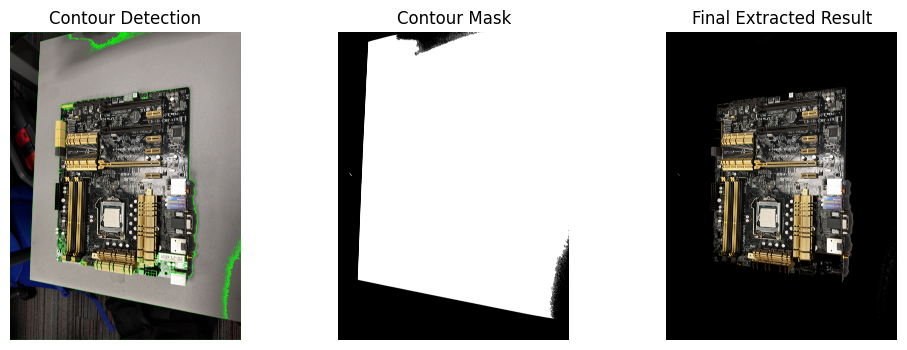

In [ ]:
# OpenCV image processing

  # thresholding

pcb_image_gs = cv2.cvtColor(pcb_image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(pcb_image_gs, 88, 255, cv2.THRESH_BINARY)

thresh_inv = cv2.bitwise_not(thresh)

  # finding + drawing contours and applying mask

contours, _ = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = pcb_image.copy()

cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

mask = np.zeros_like(pcb_image)

cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

result = cv2.bitwise_and(pcb_image, mask)

  # masking background

_, thresh = cv2.threshold(pcb_image_gs, 92, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(pcb_image)

cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

masked_img = cv2.bitwise_and(result, mask)


  # displaying all figures

plt.figure(figsize=(12, 4))

plt.subplot(131),
plt.imshow(contour_img)
plt.title('Contour Detection')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title('Contour Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(masked_img)
plt.title('Final Extracted Result')
plt.axis('off')

plt.show()


# Step 2 - YOLOv8 Training

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/107.7 GB disk)


In [ ]:
# YOLOV8 model training

  # loading pretrained YOLOv8 nano model

model = YOLO('yolov8n.pt')

  # training

model_results = model.train(data='drive/MyDrive/Project 3 Data/data/data.yaml', epochs=100, imgsz=950, batch=5, name='custom_pcb_YOLOv8_model')


 # Step 3 - YOLOv8 Evaluation

In [ ]:
from pathlib import Path
from PIL import Image
from IPython.display import Image as IPImage

In [ ]:
  # loading custom YOLOv8 model

custom_model = YOLO('/content/runs/detect/custom_pcb_YOLOv8_model2/weights/best.pt')

  # loading and grouping test images

eval_folder = Path("/content/drive/MyDrive/Project 3 Data/data/evaluation")

test_image_files = list(eval_folder.glob("*.jpg"))

  # displaying results

for image_file in test_image_files:

    image = Image.open(image_file)
    results = model.predict(image, save=True)